# Kalman Filter

The Kalman filter [1] and its variants, including but not limit to extended Kalman filter, ensemble Kalman filter [2], unscented Kalman filter [3], and cubature Kalman filter [4] are developed to sequentially update the probability distribution of states in  partially  observed  dynamics:

$$\begin{align}
  &\textrm{evolution:}    &&\theta_{n+1} = \mathcal{F}(\theta_{n}) +  \omega_{n+1}, &&\omega_{n+1} \sim \mathcal{N}(0,\Sigma_{\omega}) \label{eq:evolve}\\
  &\textrm{observation:}  &&y_{n+1} = \mathcal{G}(\theta_{n+1}) + \nu_{n+1}, &&\nu_{n+1} \sim \mathcal{N}(0,\Sigma_{\nu})
\end{align}$$

Here the subscript $n$ denotes the time index, 
$\{\theta_n\}$ are the unknown states, which evolve with the state-evolution model $\mathcal{F}$,
and $\{y_n\}$ are the (partial) observations, which are observed with the observation model $\mathcal{G}$.
And both evolution errors $\{\omega_{n}\}$  and observation errors $\{\nu_{n}\}$ are assumed to 
be independent and identically distributed zero-mean Gaussian random variables, with evolution error covariance matrix $\Sigma_{\omega}$ and observation error  covariance matrix $\Sigma_{\nu}$.



Kalman filtering is a two-step procedure:  
* the prediction step, where the state is computed forward in time;
* the analysis step, where the state and its uncertainty are corrected to take into account the observation.

In the following, we will introduce the Kalman filtering process with a special state-evolution model---stationary dynamics. This serves as the first step towards using Kalman filter techniques to solve inverse problems.

1. R.E. Kalman, "A new approach to linear filtering and prediction problems".

2. G. Evensen, "Sequential data assimilation with a nonlinear quasi-geostrophic model using Monte Carlo methods to forecast error statistics".

3. S.J. Julier, J.K. Uhlmann, "Unscented filtering and nonlinear estimation".

4. I. Arasaratnam, S. Haykin, "Cubature kalman filters".

# Kalman Filter on the Stationary Dynamics

Consider a special state-evolution model 

$$\mathcal{F}(\theta) = r + \alpha(\theta - r)$$

When $\alpha = 1$ the model is an identical mpa; when $\alpha \in [0, 1)$, the model has a stationery point $r$.

The resulting dynamic becomes

$$\begin{align}
  &\textrm{evolution:}    &&\theta_{n+1} = r + \alpha (\theta_{n}  - r) +  \omega_{n+1}, &&\omega_{n+1} \sim \mathcal{N}(0,\Sigma_{\omega}),\\
  &\textrm{observation:}  &&y_{n+1} = \mathcal{G}(\theta_{n+1}) + \nu_{n+1}, &&\nu_{n+1} \sim \mathcal{N}(0,\Sigma_{\nu}).
\end{align}$$

## The Gaussian Approximation Algorithm

Let denote $Y_n=\{y_{\ell}\}_{\ell=1}^{n}$, then Kalman filter process aims to approximate $\mu_n(d\theta)$, the conditional distribution of $\theta_n|Y_n$. In the predition step, we predict $\mu_n 
\mapsto \hat{\mu}_{n+1}$, where $\hat{\mu}_{n+1}$ is the distribution
of $\theta_{n+1}|Y_n$; in the analysis step, we update 
$\hat{\mu}_{n+1} \mapsto \mu_{n+1}$, 

This conceptual algorithm maps Gaussians into Gaussians.
Re refer to it henceforth as the Gaussian Approximation Algorithm.

### Prediction Step
Assume that $\mu_n \approx \mathcal{N}(m_n,C_n)$. 
Note that, under the linear evolution,
$\hat{\mu}_{n+1}$ is also Gaussian with mean and covariance

$$ \hat{m}_{n+1} = \mathbb{E}[\theta_{n+1}|Y_n] =  r + \alpha (m_n  - r) \qquad 
\hat{C}_{n+1} = \mathrm{Cov}[\theta_{n+1}|Y_n] = \alpha^2C_{n} + \Sigma_{\omega}$$

### Analysis Step
The algorithm proceeds by introducing the joint distribution
of $\theta_{n+1}, y_{n+1}|Y_n$,  projecting this onto a Gaussian by computing
its mean and covariance, and then conditioning this Gaussian to obtain
a Gaussian approximation  $\mathcal{N}(m_{n+1},C_{n+1})$ to $\mu_{n+1}.$

In the analysis step, we assume that the joint distribution of  $\{\theta_{n+1}, y_{n+1}\}|Y_{n}$ can be approximated by a Gaussian distribution

$$\begin{equation}
     \mathcal{N}\Bigl(
    \begin{bmatrix}
    \hat{m}_{n+1}\\
    \hat{y}_{n+1}
    \end{bmatrix}, 
    \begin{bmatrix}
   \hat{C}_{n+1} & \hat{C}_{n+1}^{\theta p}\\
    {\hat{C}_{n+1}^{\theta p}}{}^{T} & \hat{C}_{n+1}^{pp}
    \end{bmatrix}
    \Bigr).
\end{equation}$$

Then, with $\mathbb{E}$ denoting expectation with respect to 
$\theta_{n+1}|Y_n \sim \mathcal{N}( \hat{m}_{n+1},\hat{C}_{n+1})$, 

$$\begin{align*}
    \hat{y}_{n+1} =     & \mathbb{E}[\mathcal{G}(\theta_{n+1})|Y_n], \\
    \hat{C}_{n+1}^{\theta p} =     &  \mathrm{Cov}[\theta_{n+1}, \mathcal{G}(\theta_{n+1})|Y_n],\\
    \hat{C}_{n+1}^{p p} = &  \mathrm{Cov}[\mathcal{G}(\theta_{n+1})|Y_n] + \Sigma_{\nu}.
\end{align*}$$

Conditioning the Gaussian to find $\theta_{n+1}|\{Y_n,y_{n+1}\}=\theta_{n+1}|Y_{n+1}$ gives the following
expressions for the mean $m_{n+1}$ and covariance $C_{n+1}$ of the
approximation to $\mu_{n+1}:$

$$
\begin{equation}
\label{eq:KF_analysis}
    \begin{split}
        m_{n+1} &= \hat{m}_{n+1} + \hat{C}_{n+1}^{\theta p} (\hat{C}_{n+1}^{p p})^{-1} (y_{n+1} - \hat{y}_{n+1}),\\
        C_{n+1} &= \hat{C}_{n+1} - \hat{C}_{n+1}^{\theta p}(\hat{C}_{n+1}^{p p})^{-1} {\hat{C}_{n+1}^{\theta p}}{}^{T}.
    \end{split}
\end{equation}
$$

These equations establish a conceptual description of the Kalman filter process, however, when $\mathcal{G}$ is nonlinear, to evaluate these integrals,
$\hat{y}_{n+1}$, $\hat{C}_{n+1}^{\theta p}$ and $\hat{C}_{n+1}^{p p}$, different nonlinear Kalman filters are required.



# Kalman Inversion
As  a  method  for  solving  the [inverse problem](Bayesian.ipynb)

$$y = \mathcal{G}(\theta) + \eta$$

The Gaussian Approximation Algorithm  is  implemented  by  assuming  all observations $\{y_n\}$ are  identical  to $y$ ($Y_n = y$) and  iterating  in $n$.


# Nonlinear Kalman Filters

Let denote Gaussian random variable $\theta \sim \mathcal{N}(m, C) \in \mathcal{R}^{N_{\theta}}$ and arbitrary functions $\mathcal{G}_i: \mathcal{R}^{N_{\theta}} \mapsto \mathcal{R}^{N_{y}}$, different nonlinear Kalman filters are designed to approximate the mean and covariance of $\theta$ under these nonlinear transforms:

$$\mathbb{E}\mathcal{G}_i(\theta) \quad \mathrm{Cov}(\mathcal{G}_1, \mathcal{G}_2)$$


## Extended Kalman Filter

Extended Kalman filter linearizes the functions $\mathcal{G}_i$, by means of the Taylor 
approximation of the first order:

$$\mathcal{G}_i(\theta) \approx \mathcal{G}_i(m) + d\mathcal{G}_i(m)(\theta - m)$$

And it approximates these integrals analytically:

$$ \begin{align*} 
&\mathbb{E}\mathcal{G}_i(\theta) = \mathcal{G}_i(m), \\
&\mathrm{Cov}(\mathcal{G}_1, \mathcal{G}_2) =  d\mathcal{G}_1(m)C d\mathcal{G}_2(m)^T
\end{align*}$$

However, extended Kalman filter requires gradient computation.

In [1]:
function ExKF(G::Function, m::Array{Float64,1}, C::Array{Float64,2})
    g, dg = G(m)
    mg, Cg = g, dg*C*dg'
    
    return mg, Cg
end

ExKF (generic function with 1 method)

## Unscented Kalman Filter

Unscented Kalman filter utilizes a deterministic quadrature rule to approximate these integrals.
This is the idea of the unscented transform [3] which we now define. 

* Let generate $2N_{\theta}+1$ symmetric sigma points deterministically:

    $$\begin{align*}
    \theta^0 &= m\\
    \theta^j &= m + c_j [\sqrt{C}]_j \quad (1\leq j\leq N_\theta)\\
    \theta^{j+N_\theta} &= m - c_j [\sqrt{C}]_j\quad (1\leq j\leq N_\theta)
    \end{align*}
    $$

    where $[\sqrt{C}]_j$ is the $j$th column of the Cholesky factor of $C$. 
    
    
* The quadrature rule approximates the mean and covariance of the transformed variable $\mathcal{G}_i(\theta)$ as follows,  
    
    $$\begin{align*}
    \mathbb{E}[\mathcal{G}_i(\theta)] \approx \mathcal{G}_i(\theta^0)\qquad 
    \mathrm{Cov}[\mathcal{G}_1(\theta),\mathcal{G}_2(\theta)]  \approx \sum_{j=1}^{2N_{\theta}} W_j^{c} \Big(\mathcal{G}_1(\theta^j) - \mathbb{E}\mathcal{G}_1(\theta)\Big)\Big(\mathcal{G}_2(\theta^j) - \mathbb{E}\mathcal{G}_2(\theta)\Big)^T 
    \end{align*}
    $$
    
    Here these constant weights are 
    
    $$
    \begin{align*}
    &c_j = \sqrt{N_\theta +\lambda} \qquad W_j^{c} = \frac{1}{2(N_\theta+\lambda)}~(j=1,\cdots,2N_{\theta}).\\
    &\lambda = a^2 (N_\theta + \kappa) - N_\theta \quad a=\min\{\sqrt{\frac{4}{N_\theta + \kappa}},  1\}\quad  \kappa = 0\\
    \end{align*}
    $$
    

This unscented transform is different from the original unscented transform. The modification we employ here replaces the original 2nd-order approximation of the $\mathbb{E}[\mathcal{G}_i(\theta)]$ with its 1st-order counterpart. We do this to avoid negative weights; it also has ramifications for the optimization process. Finally we mention that our modified unscented transform retains the
properties of exactness for mean and covariance under arbitrary linear transformations $\mathcal{G}_1$ and $\mathcal{G}_2$. 



In [2]:
using LinearAlgebra

function UKF(G::Function, m::Array{Float64,1}, C::Array{Float64,2})
    N_θ = length(m)
    N_ens = 2N_θ + 1
    
    # weights
    κ = 0.0
    a = min(sqrt(4/(N_θ + κ)), 1.0)
    λ = a^2*(N_θ + κ) - N_θ
    sigma_weight = sqrt(N_θ + λ)
    cov_weight = 1/(2(N_θ + λ))
    
    # generate sigma points
    chol_C = cholesky(Hermitian(C)).L
    θ = zeros(Float64, N_θ, N_ens)
    θ[:, 1] = m
    for i = 1: N_θ
        θ[:, i+1] = m + sigma_weight*chol_C[:,i]
        θ[:, i+1+N_θ] = m - sigma_weight*chol_C[:,i]
    end
    
    g = zeros(Float64, N_θ, N_ens)
    for i = 1: 2N_θ+1
        g[:, i], _ = G(θ[:, i])
    end
    
    # compute mean 
    mg = g[:, 1]
    
    Cg = zeros(Float64, N_θ, N_θ)
    for i = 1: N_ens
        Cg .+= cov_weight*(g[:, i] - mg)*(g[:, i] - mg)'
    end
    
    return mg, Cg 
end

UKF (generic function with 1 method)

## Ensemble Kalman Filter (Monte Carlo Kalman Filter)
Ensemble Kalman Filter utilizes Monte Carlo sampling to approximate these integrals. 
Let draw samples $\{\theta^j\}_{j=1}^{J}$ from $\mathcal{N}(m, C)$, the mean and covariance of the transformed variables are

$$ 
\begin{align*} 
&\mathbb{E}\mathcal{G}_i(\theta) = \frac{1}{J}\sum_{j=1}^J\mathcal{G}_i(\theta^j), \\
&\mathrm{Cov}(\mathcal{G}_1, \mathcal{G}_2) = \frac{1}{J-1}\sum_{j=1}^J\Big(\mathcal{G}_1(\theta^j) - \mathbb{E}\mathcal{G}_1(\theta)\Big)\Big(\mathcal{G}_2(\theta^j) - \mathbb{E}\mathcal{G}_2(\theta)\Big)^T
\end{align*}
$$


However, ensemble Kalman filter does not take advantage of the Gaussian information, and the performance might be sensitive to the ensemble size $J$.



In [10]:
using Random, Distributions
function EKF(G::Function, m::Array{Float64,1}, C::Array{Float64,2}, J::Int64)
    N_θ = length(m)
    
    θ = rand(MvNormal(m, C), J)

    g = zeros(Float64, N_θ, J)
    for i = 1: J
        g[:, i], _ = G(θ[:, i])
    end
    
    
    mg = sum(g, dims=2)/J
    
    Cg = zeros(Float64, N_θ, N_θ)
    for i = 1: J
        Cg .+= (g[:, i] - mg)*(g[:, i] - mg)'
    end
    Cg ./= (J - 1)
    
    return mg, Cg, g

end

EKF (generic function with 1 method)

# Numerical Example
Consider the following 2-dimensional example:


$$
\theta \sim \mathcal{N}\Big(\begin{bmatrix} 10 \\ 10 \end{bmatrix}, 
\begin{bmatrix} 1^2 & 0\\ 0 & 1^2 \end{bmatrix}\Big)
$$
here the covariance roughly represents $10\%$ error, which is the case for most inverse problems. 

$$\mathcal{G}(\theta) = \begin{bmatrix} 1 + \sqrt{\theta_{(1)}^2 + \theta_{(2)}^2} \\
                 e^{\frac{\theta_{(1)}}{2}} + \theta_{(2)}^3 \end{bmatrix}$$ 
                 
The distributions of $\mathcal{G}(\theta)$ obtained by different Kalman filters are visualized, the grey dots represent the "true" distribution obtained by the Monte Carlo method.

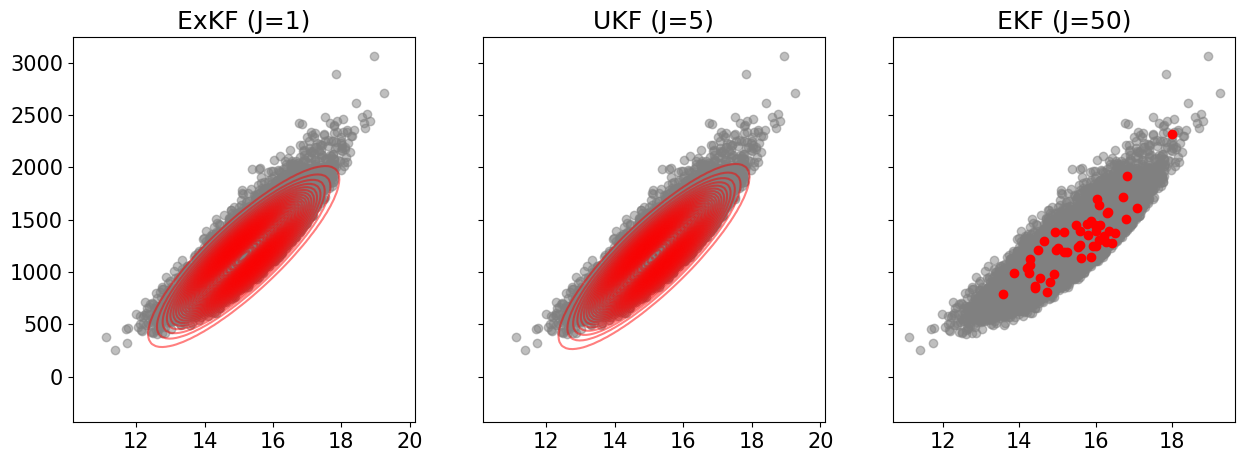

┌ Info: mean estimation: 
│ MCKF: [15.16950449395159; 1197.1442592762528] 
│ ExKF: [15.142135623730951, 1148.4131591025766] 
│ UKF: [15.142135623730951, 1148.4131591025766] 
│ EKF: [15.547075817721984; 1299.9015929782684]
└ @ Main In[100]:35
┌ Info: cov estimation:  
│ MCKF: [0.9773239203173951 269.92020903357275; 269.92020903357275 100613.70633284048] 
│ ExKF: [0.9999999999999998 264.6040099653392; 264.6040099653392 95506.61644870168] 
│ UKF: [0.9962594937486138 271.575304310355; 271.575304310355 100239.69273127784] 
│ EKF: [0.8564357017992346 222.0238714500323; 222.0238714500323 82886.31088975671]
└ @ Main In[100]:37


In [100]:
include("../Inversion/Plot.jl")
function G(θ)
    g = [1 + sqrt(θ[1]^2 + θ[2]^2); exp(θ[1]/2) + θ[2]^3]
    dg = [θ[1]/(sqrt(θ[1]^2 + θ[2]^2)) θ[2]/(sqrt(θ[1]^2 + θ[2]^2)); 
          exp(θ[1]/2)/2                3θ[2]^2]
    return g, dg
end

m, C = [10.0; 10.0], [1.0^2 0.0; 0.0 1.0^2]

mckf = EKF(G, m, C, 10000)
exkf = ExKF(G, m, C)
ukf = UKF(G, m, C)
ekf = EKF(G, m, C, 50)


Nx = Ny = 100 

fig, ax = PyPlot.subplots(ncols=3, sharex=false, sharey=true, figsize=(15,5))
for i = 1:3
    ax[i].scatter(mckf[3][1, :], mckf[3][2, :], color = "grey", alpha=0.5, label = "MCMC")
end

X,Y,Z = Gaussian_2d(exkf[1], exkf[2], Nx, Ny)
ax[1].contour(X, Y, Z, 50, colors = "red", alpha=0.5, label = "ExKF (J=1)")
ax[1].set_title("ExKF (J=1)")

X,Y,Z = Gaussian_2d(ukf[1], ukf[2], Nx, Ny)
ax[2].contour(X, Y, Z, 50, colors = "red", alpha=0.5, label = "UKF (J=5)")
ax[2].set_title("UKF (J=5)")

ax[3].scatter(ekf[3][1, :], ekf[3][2, :], color = "red", label = "EKF")
ax[3].set_title("EKF (J=50)")

@info "mean estimation: \nMCKF: $(mckf[1]) \nExKF: $(exkf[1]) \nUKF: $(ukf[1]) \nEKF: $(ekf[1])"

@info "cov estimation:  \nMCKF: $(mckf[2]) \nExKF: $(exkf[2]) \nUKF: $(ukf[2]) \nEKF: $(ekf[2])"
